# Masterthesis
## PreprocessingControlling

**Imports and Definitions**
- The necessary libraries are loaded here and important variables are defined

**Imports and settings for this script**
- Import libraries and set variables for this script

**Calculate best hampel filter value**
- Create a resultfile of hampelfilter with different windowssize

**Create summary of humpel filter analyse**
- Create a boxplot of the resultfile


In [1]:
# Import sklearn
import sklearn

# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# To calculate amplitude and phase
import math

# Measure runtime of a jupyter jotebook code cell
from timeit import default_timer as timer

# Used to check if file exists
import os

# Used to check if directory exists
import pathlib

# Import Operation System Calls
import SubOperationSystem

# check os
if os.name == 'nt':
    print("OS is Windows")
    Delimiter = '\\'
    
else:
    print("OS is Linux")
    Delimiter = '/'
    
# Path of datasets (root directory)
PathDataset = 'Dataset' + Delimiter    

# Path of datasets
PathDatasetSub = PathDataset + 'CsiFilesRah' + Delimiter
        
# Path of the converted files
PathConverted = PathDataset + 'Converted' + Delimiter

# Set path for scenario files
PathScenario = PathDataset + 'Scenario' + Delimiter

# Set path for scenario files
PathResult = PathDataset + 'Result' + Delimiter

# Set path for scenario files
PathPlot = PathDataset + 'Plot' + Delimiter

# Set path for scenario files
PathConfig = 'FilesConfig' + Delimiter

# Scenariofile (file with info about the ten scenarios)
FileScenario = 'FileScenario.csv'

# Mappingfile (file with info about original and converted filenames)
FileMapping = 'FileMapping.csv'


OS is Windows


# Imports and settings for this script

In [2]:
# Import mathplot
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Display graph in jupyter notebook
%matplotlib inline

# Import hampel
from hampel import hampel

# Import mpatches for legende
import matplotlib.patches as mpatches

# Result file Hampelfilter
FileResultFilterHampel = 'FileResultFilterHampel.csv'

# Calculate best hampel filter value

In [ ]:
# Read the mapping file. This file contains the mapping between old filename and new filename.
dfFiles = pd.read_csv(PathConfig + FileMapping, sep=',')

# Create dictionary for results
Colums = ({'File':[], 'Windowssize':[], 'Value' :[], 'Duration':[]})

# Add colums to dataframe
dfResult = pd.DataFrame(Colums)

# loop through dataframe files
for ind in dfFiles.index:
    
    # Get filenames
    LineNumber,FilenameOld,FilenameNew = (dfFiles['LineNumber'][ind], dfFiles['FilenameOld'][ind], dfFiles['FilenameNew'][ind])
        
    # Rename filename with ampitude label
    DataFileAmplitude = FilenameNew.replace(".csv", "_a.csv")

    # Read csv file to dataframe and remove label column
    df = pd.read_csv(PathConverted + DataFileAmplitude)
    df = df.drop("label",axis=1)
    
    # copy df to numpy array
    ArrayCsiUnfiltered = df.to_numpy()
    ArrayCsiFiltered = df.to_numpy()
    
    # loop for windows_size (1..19)
    for ws in range(1,20):
           
        # hampel filter to remove outlier
        for y in range(df.shape[1]):
            ArrayCsiFiltered[:,y] = hampel(ArrayCsiUnfiltered[:,y],window_size=ws, n_sigma=3.0).filtered_data

        # Add results to df
        result = pd.DataFrame({'File':DataFileAmplitude,
                               'Windowssize':ws,
                               'Value':np.max(ArrayCsiFiltered), 
                               'Duration':end - start}, index=[0])
        
        # Add dataframe in the right seqeuenz
        dfDataframes = [dfResult,result]
        dfResult = pd.concat(dfDataframes).reset_index(drop=True)
        
        # Save values
        dfResult.to_csv(PathResult + FileResultFilterHampel, index=False)

# close file
dfResult.close()


## Create summary of humpel filter analyse

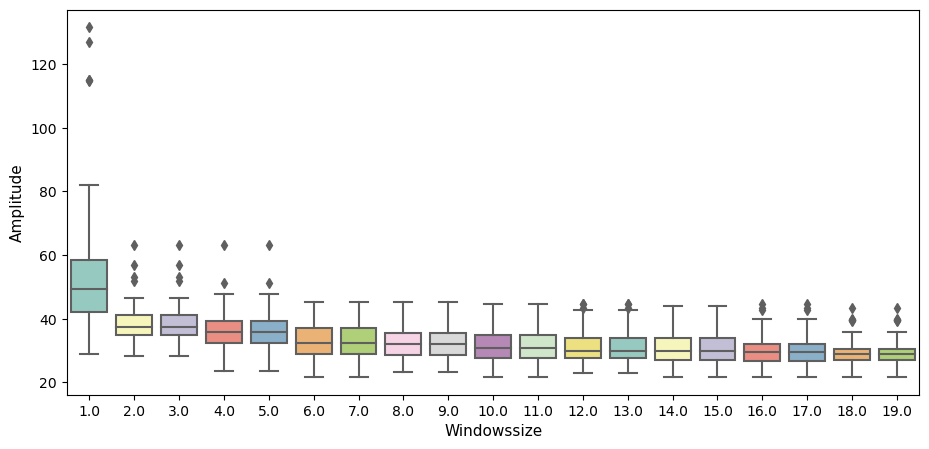

In [4]:
# Read hampel result file
df = pd.read_csv(PathResults + FileResultFilterHampel, sep=',')

# Select target column
y = df['Value']

# Select x column
x = df['Windowssize']

# Set figure size
plt.figure(figsize=(11,5))

# Create seaborn box
sns.boxplot(x=x, y=y, palette="Set3")

# Set label of seaborn box
plt.xlabel("Windowssize", size=11)
plt.ylabel("Amplitude", size=11)

# 
patch = mpatches.Patch(color='gray', label='Gray data')
plt.legend(handles=[patch], loc='upper right')

# Save plot (needed for masterthesis)
plt.savefig(PathResults + "ResultHumpelFilter.png")
